In [1]:
cd C:\Data\20170412\p4_2

C:\Data\20170412\p4_2


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py as h5py
import glob as glob
import numpy as np
import scipy.io
import sys
sys.path.append('C://Users/Ginty Lab/My Documents/Github/kwik-tools')
import read_rhd as rhd
import klusta
from klusta.kwik import KwikModel
kwik_path = 'C:/DATA/20170412/p4_2/p4_2_170412_.kwik'
model = KwikModel(kwik_path)

In [4]:
good = []

for k in model.cluster_groups.keys():
    if model.cluster_groups[k] == 'good':
        good.append(k)

In [5]:
times = model.spike_times
spikes = model.spike_clusters
goodspikes = []
goodtimes = []
good = sorted(good)
for i,n in enumerate(spikes):
    if n in good:
        goodtimes.append(times[i])
        goodspikes.append(good.index(spikes[i]))

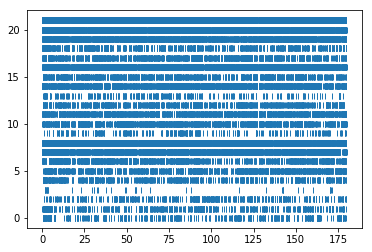

In [6]:
ltime = 0 # in seconds
rtime = 180 # in seconds
goodtimes = np.array(goodtimes)
goodspikes = np.array(goodspikes)
plt.plot(goodtimes[(goodtimes > ltime) & (goodtimes < rtime)],goodspikes[(goodtimes > ltime) & (goodtimes < rtime)],'|')

In [7]:
import load_intan_input_channels as liic

In [8]:
[di,ai] = liic.load_intan_input_channels()

In [11]:
#load traces from nidaq and break out into variables
a = scipy.io.matlab.loadmat("acquireIntanBrush_170412 1309 11.mat")
matlab_brush = a['data'][:,0]
matlab_sync = a['data'][:,1]
matlab_sync[matlab_sync < 1.5] = 0
matlab_sync[matlab_sync > 1.5] = 1

# load traces from intan and break out into variables
intan_sync = di['1']
intan_trigger = di['0']

In [12]:
matlab_brush_extra_added = np.append(np.zeros(20729),matlab_brush) # calculated by comparing first transitions in sync signal
matlab_sync_extra_added = np.append(np.ones(20729), matlab_sync)

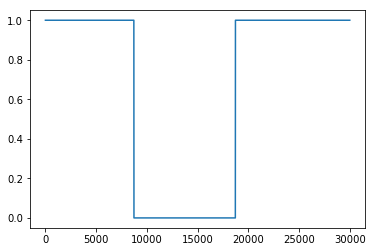

In [20]:
#plt.plot(matlab_brush_extra_added)
plt.plot(matlab_sync_extra_added[30000:60000])
plt.plot(intan_sync[300000:60000])

In [21]:
matlab_transitions = (np.where(matlab_sync_extra_added[:-1] != matlab_sync_extra_added[1:])[0])
intan_transitions = (np.where(intan_sync[:-1] != intan_sync[1:])[0])
print(intan_transitions[0:10])
print(matlab_transitions[0:10])
print((matlab_transitions - np.roll(matlab_transitions, 1))/20000)
print((intan_transitions - np.roll(intan_transitions, 1))/20000)

[ 39183  49186 142613 152616 246143 256146 349774 359777 453504 463507]
[ 38716  48719 142147 152151 245679 255682 349310 359313 453041 463045]
[-178.63885    0.50015    4.6714     0.5002     4.6764     0.50015
    4.6814     0.50015    4.6864     0.5002     4.6914     0.50015
    4.6964     0.5002     4.7014     0.50015    4.7064     0.5002     4.7114
    0.50015    4.7164     0.5002     4.7214     0.50015    4.7264     0.5002
    4.7314     0.50015    4.7364     0.5002     4.7414     0.50015
    4.74645    0.50015    4.7514     0.50015    4.75645    0.50015
    4.7614     0.5002     4.7664     0.5002     4.7714     0.50015
    4.77645    0.50015    4.78145    0.50015    4.7864     0.5002     4.7914
    0.50015    4.79645    0.50015    4.80145    0.50015    4.80645
    0.50015    4.81145    0.50015    4.81645    0.50015    4.82145
    0.50015    4.82645    0.50015    4.83145    0.50015    4.83645]
[-178.637      0.50015    4.67135    0.50015    4.67635    0.50015
    4.6814     0.5001

In [22]:
print(np.where(intan_sync[:-1] != intan_sync[1:])[0][0:10] - (np.where(matlab_sync[:-1] != matlab_sync[1:])[0][0:10]))
print(len(intan_sync),len(matlab_sync))

[20730 20730 20729 20728 20727 20727 20727 20727 20726 20725]
3620880 3600000


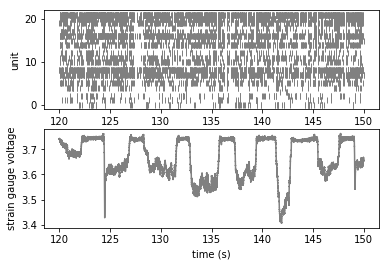

In [27]:
sample_rate = model.sample_rate
ltime = 120
rtime = 150
lsamples = ltime * sample_rate
rsamples = rtime * sample_rate


#plt.plot(d)
#plt.plot(intan_sync)
plt.subplot(2,1,1)
plt.plot(goodtimes[(goodtimes > ltime) & (goodtimes < rtime)],goodspikes[(goodtimes > ltime) & (goodtimes < rtime)],'|',color=[0.5,0.5,0.5])
plt.xlabel('time (s)')
plt.ylabel('unit')
plt.subplot(2,1,2)
plt.plot(np.arange(ltime,rtime,(rtime-ltime)/(rsamples-lsamples)),matlab_brush_extra_added[int(lsamples):int(rsamples)],color = [0.5, 0.5, 0.5])
plt.xlabel('time (s)')
plt.ylabel('strain gauge voltage')

In [104]:
def make_psth(bin_size,sample_rate, spiketimes, spikeclusters):
    # Use this to convert spike time rasters into PSTHs with user-defined bin
    # Output is organized in time x unit array
    bin_samples = bin_size * sample_rate
    max_bin = max(spiketimes) / bin_size
    print(max_bin)
    num_units = max(goodspikes)
    psths = np.zeros([int(np.floor(max_bin)), num_units])
    for i in range(len(spikeclusters)):
        psths[int(np.floor(spiketimes[i]/bin_size))-1, spikeclusters[i]-1] += 1
    psth_dict = {}
    psth_dict['psths'] = psths/bin_size #in units of Hz
    psth_dict['bin_size'] = bin_size #in s
    psth_dict['sample_rate'] = sample_rate # in Hz
    return psth_dict
            

In [143]:
psth_dict = make_psth(0.25,sample_rate,goodtimes,goodspikes)
psths = psth_dict['psths']
psth_binsize = psth_dict['bin_size']

724.126


(3, 4)

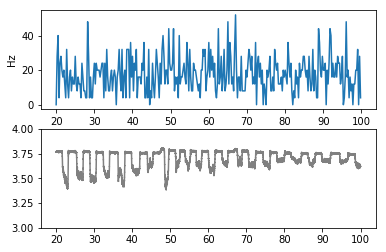

In [150]:
sample_rate = model.sample_rate
ltime = 20
rtime = 100
lsamples = ltime * sample_rate
rsamples = rtime * sample_rate

plt.subplot(211)
plt.plot(np.arange(ltime,rtime,psth_binsize),psths[int(ltime/psth_binsize):int(rtime/psth_binsize),15])
plt.ylabel('Hz')
plt.subplot(212)
plt.plot(np.arange(ltime,rtime,(rtime-ltime)/(rsamples-lsamples)),matlab_brush_extra_added[int(lsamples):int(rsamples)],color = [0.5, 0.5, 0.5])
plt.ylim([3, 4])

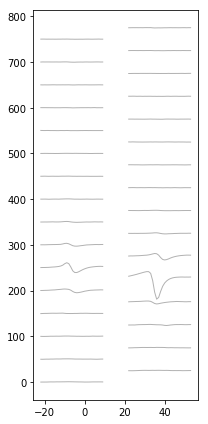

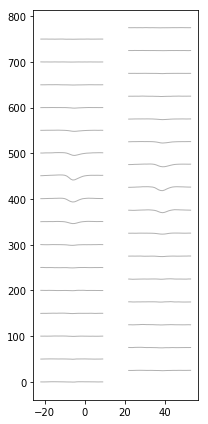

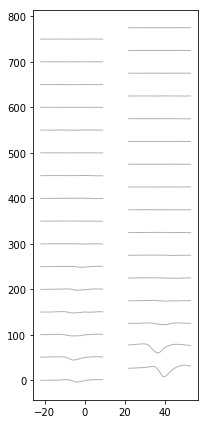

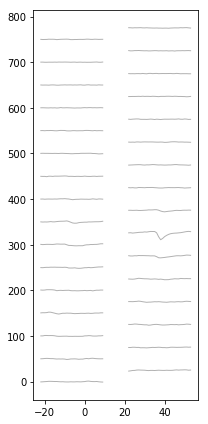

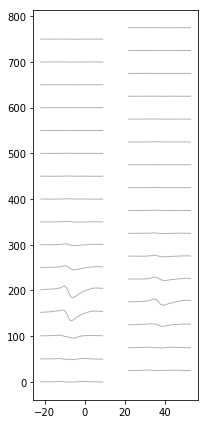

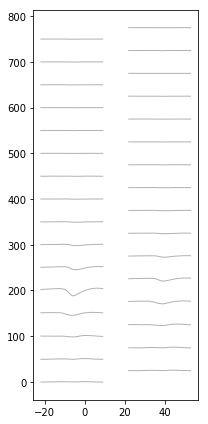

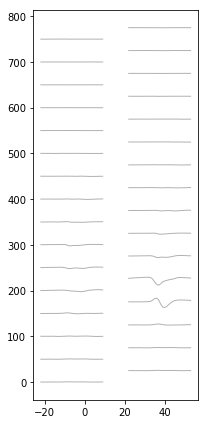

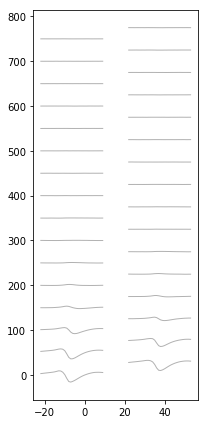

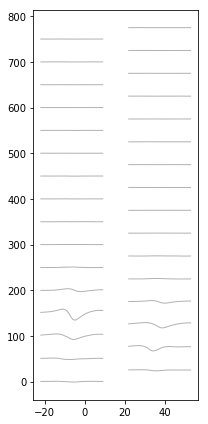

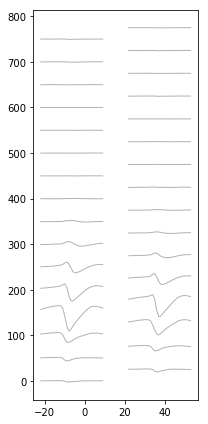

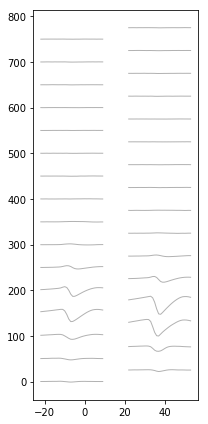

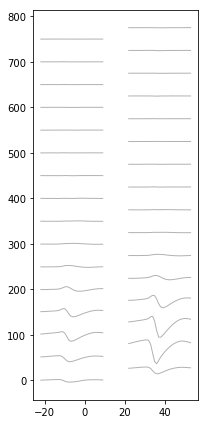

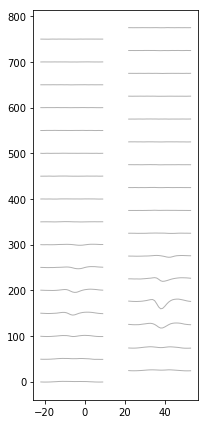

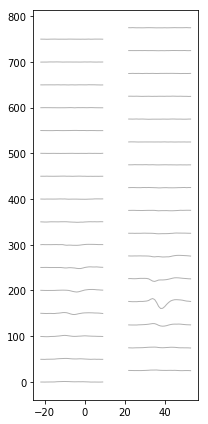

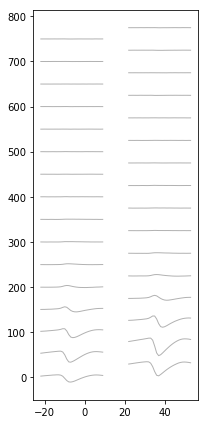

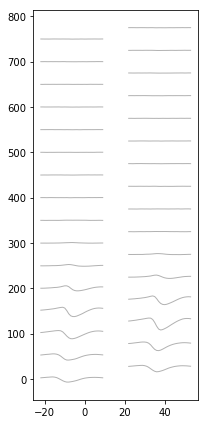

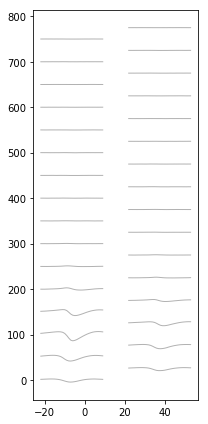

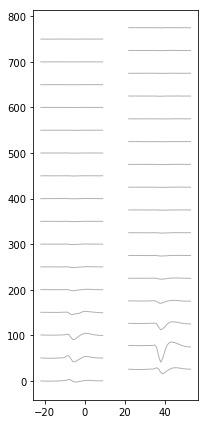

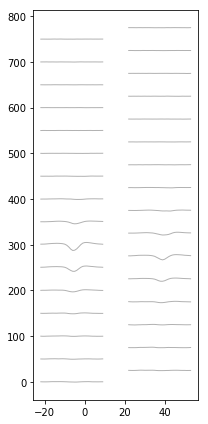

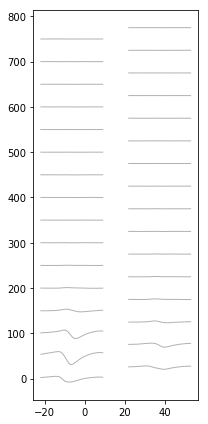

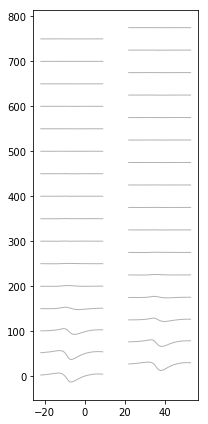

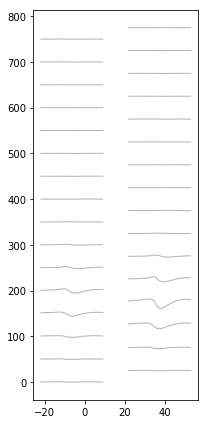

In [29]:
for cluster in good:
    plot_cluster_waveforms(model,cluster,1000,save=True)

In [28]:
def get_cluster_waveforms (kwik_model,cluster_id):
    try:
        if (not(type(kwik_model) is KwikModel)):
            raise ValueError       
    except ValueError:
            print ("Exception: the first argument should be a KwikModel object")
            return
        
    clusters = kwik_model.spike_clusters
    try:
        if ((not(cluster_id in clusters))):
            raise ValueError       
    except ValueError:
            print ("Exception: cluster_id (%d) not found !! " % cluster_id)
            return
    
    idx=np.argwhere (clusters==cluster_id)
    w=model.all_waveforms[idx]
    return w

def plot_cluster_waveforms (kwik_model,cluster_id,nspikes, save=False,save_path=None):
    
    w = get_cluster_waveforms (kwik_model,cluster_id)
    y_scale = 1
    x_scale = 1
    num_channels = w.shape[2]
    waveform_size = w.shape[1]
    np.random.seed()
    
    fig=plt.figure(num=None, figsize=(3, 6), facecolor='w', edgecolor='k')
    plt.clf()
    spike_id = np.arange(w.shape[0])
    np.random.shuffle(spike_id)
    spike_id = spike_id[0:nspikes]
    for ch in range (0,num_channels):
        x_offset = model.channel_positions [ch,0]
        y_offset = model.channel_positions [ch,1]*y_scale
        mu_spikes = np.mean(w[:,:,ch],0)
        for i in spike_id:
            spike = w[i,:,ch]
            x=x_scale*x_offset+range(0,waveform_size)
            #plt.plot (x,0.05*spike+y_offset,color="gray",alpha=0.5)
        plt.plot (x,0.05*mu_spikes+y_offset,"-",color="black",linewidth=1,alpha=0.3)
    plt.tight_layout()
    plt.show()
    if (save):
        if (save_path):
            filename = "%s/waveform_%02d.pdf" % (save_path,cluster_id)
        else:
            filename = "waveform_%02d.pdf" % cluster_id
        fig.savefig (filename)